In [60]:
import patsy as ps
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(ps.demo_data("x1","x2","x3","x4","x5"))

In [4]:
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [8]:
help(ps.dmatrix)
eval_env=0
NA_action='drop'
return_type='matrix'

Help on function dmatrix in module patsy.highlevel:

dmatrix(formula_like, data={}, eval_env=0, NA_action='drop', return_type='matrix')
    Construct a single design matrix given a formula_like and data.
    
    :arg formula_like: An object that can be used to construct a design
      matrix. See below.
    :arg data: A dict-like object that can be used to look up variables
      referenced in `formula_like`.
    :arg eval_env: Either a :class:`EvalEnvironment` which will be used to
      look up any variables referenced in `formula_like` that cannot be
      found in `data`, or else a depth represented as an
      integer which will be passed to :meth:`EvalEnvironment.capture`.
      ``eval_env=0`` means to use the context of the function calling
      :func:`dmatrix` for lookups. If calling this function from a library,
      you probably want ``eval_env=1``, which means that variables should be
      resolved in *your* caller's namespace.
    :arg NA_action: What to do with rows th

In [10]:
titanic = sns.load_dataset("titanic")

In [22]:
ps.dmatrix("survived + pclass + sex + age + 0", data = titanic, return_type='dataframe')

DesignInfo(['sex[female]', 'sex[male]', 'survived', 'pclass', 'age'],
           factor_infos={EvalFactor('survived'): FactorInfo(factor=EvalFactor('survived'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1),
                         EvalFactor('pclass'): FactorInfo(factor=EvalFactor('pclass'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1),
                         EvalFactor('sex'): FactorInfo(factor=EvalFactor('sex'),
                                    type='categorical',
                                    state=<factor state>,
                                    categories=('female', 'male')),
                         EvalFactor('age'): FactorInfo(factor=EvalFactor('age'),
                                    type='numerical',
                          

In [30]:
ps.dmatrix("center(x1) + 0", df).design_info

DesignInfo(['center(x1)'],
           factor_infos={EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1)},
           term_codings=OrderedDict([(Term([EvalFactor('center(x1)')]),
                                      [SubtermInfo(factors=(EvalFactor('center(x1)'),),
                                                   contrast_matrices={},
                                                   num_columns=1)])]))

In [31]:
from sklearn.preprocessing import StandardScaler

In [35]:
X = np.arange(7).reshape(-1,1)

In [43]:
# scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [38]:
help(scaler)

Help on StandardScaler in module sklearn.preprocessing._data object:

class StandardScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual features do not more or less look like 

In [48]:
scaler.var_

array([4.])

In [49]:
help(np.vstack)

Help on function vstack in module numpy:

vstack(tup)
    Stack arrays in sequence vertically (row wise).
    
    This is equivalent to concatenation along the first axis after 1-D arrays
    of shape `(N,)` have been reshaped to `(1,N)`. Rebuilds arrays divided by
    `vsplit`.
    
    This function makes most sense for arrays with up to 3 dimensions. For
    instance, for pixel-data with a height (first axis), width (second axis),
    and r/g/b channels (third axis). The functions `concatenate`, `stack` and
    `block` provide more general stacking and concatenation operations.
    
    Parameters
    ----------
    tup : sequence of ndarrays
        The arrays must have the same shape along all but the first axis.
        1-D arrays must have the same length.
    
    Returns
    -------
    stacked : ndarray
        The array formed by stacking the given arrays, will be at least 2-D.
    
    See Also
    --------
    concatenate : Join a sequence of arrays along an existing axis

In [53]:
X2 = np.vstack([X, [[1000]]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [54]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
help(PolynomialFeatures)

degree : integer
  The degree of the polynomial features. Default = 2.

interaction_only : boolean, default = False
  If true, only interaction features are produced: features that are
  products of at most ``degree`` *distinct* input features (so not
  ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).

include_bias : boolean
  If True (default), then include a bias column, the feature in which
  all polynomial powers are zero (i.e. a column of ones - acts as an
  intercept term in a linear model).

order : str in {'C', 'F'}, default 'C'
  Order of output array in the dense case. 'F' order is faster to
  compute, but may slow down subsequent estimators.

  .. versionadded:: 0.21

Help on class PolynomialFeatures in module sklearn.preprocessing._data:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Parameters
 |  ----------
 |  degree : integer
 |      The degree of the polynomial features. Default = 2.
 |  
 |  interaction_only : boolean, default = False
 |      If true, only interaction features are produced: features that are
 |      products of at most ``degree`` *distinct* input features (so not
 |      ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).
 |  
 |  include_bias : boo

In [58]:
X = 90 * np.arange(9).reshape(-1, 1) 
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54632 missing from current

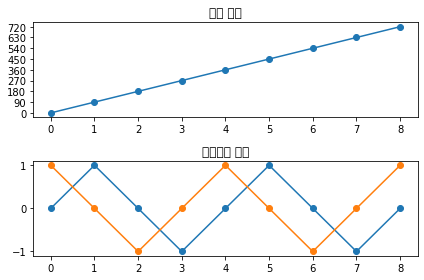

In [61]:
from sklearn.preprocessing import FunctionTransformer

def degree2sincos(X):
    x0 = np.sin(X * np.pi / 180)
    x1 = np.cos(X * np.pi / 180)
    X_new = np.hstack([x0, x1])
    return X_new

X2 = FunctionTransformer(degree2sincos).fit_transform(X)

plt.subplot(211)
plt.plot(X, marker="o")
plt.yticks(X.flatten())
plt.title("각도 표현")
plt.subplot(212)
plt.plot(X2, marker="o")
plt.title("삼각함수 표현")
plt.tight_layout()
plt.show()

In [63]:
df1 = pd.DataFrame(["Male", "Female"], columns=["x"])
df1

,x
0,Male
1,Female


In [75]:
dm = ps.dmatrix("C(x, Treatment('Male'))", data = df1)
# dm = ps.dmatrix("x + 0", data = df1)
dm

DesignMatrix with shape (2, 2)
  Intercept  C(x, Treatment('Male'))[T.Female]
          1                                  0
          1                                  1
  Terms:
    'Intercept' (column 0)
    "C(x, Treatment('Male'))" (column 1)